In [1]:
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.patches import Ellipse
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import mpld3
import os
from datetime import datetime,timedelta
import wave
import pandas as pd

In [2]:
#Selected WavFiles
wavlist=['20160604195322817529.wav','20160604204707085962.wav','20160604225619960148.wav','20160605062030818441.wav']
desclist=['Before Dusk','Dog Barking','My family go to sleep','Birds Chirping after Dawn']
n = 4

Before Dusk
Sample rate:  44100 frames per Second
Number of samples:  142800
Duration in seconds:  3.238


/Users/arp504/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/arp504/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


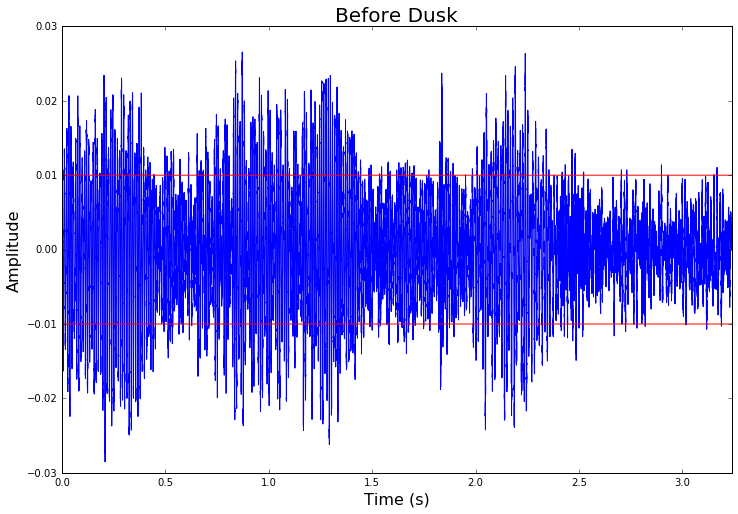

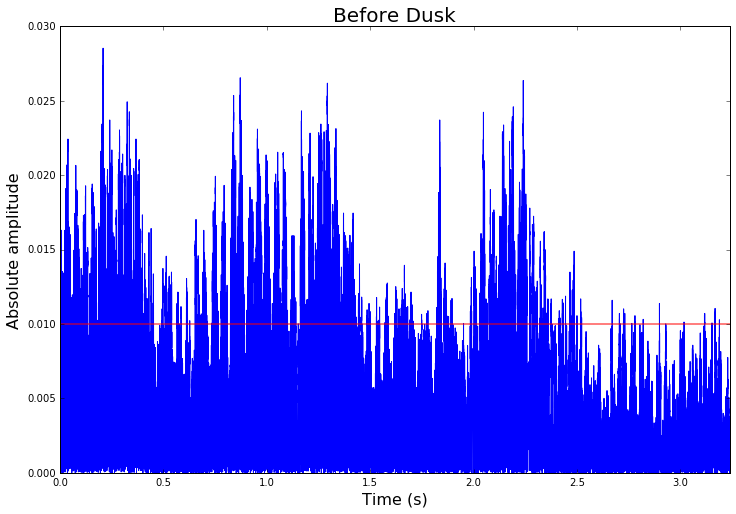

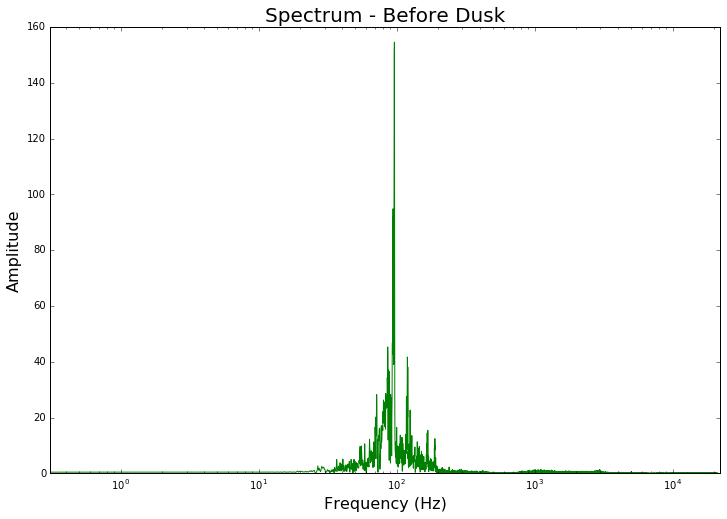

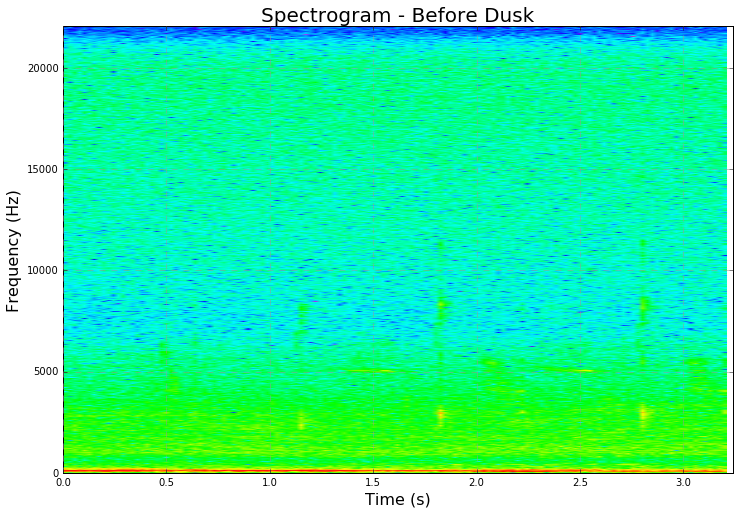

Dog Barking
Sample rate:  44100 frames per Second
Number of samples:  90300
Duration in seconds:  2.048


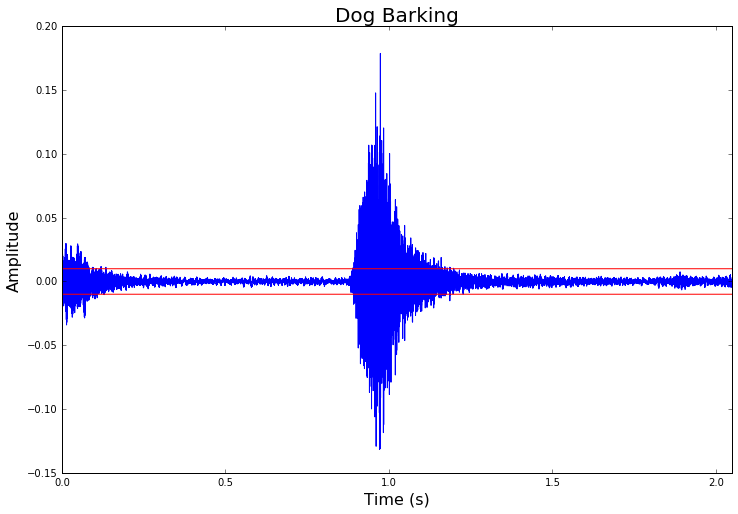

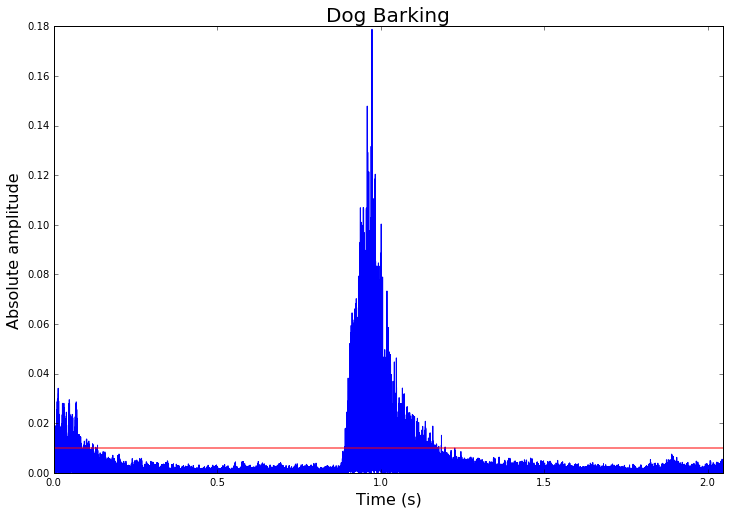

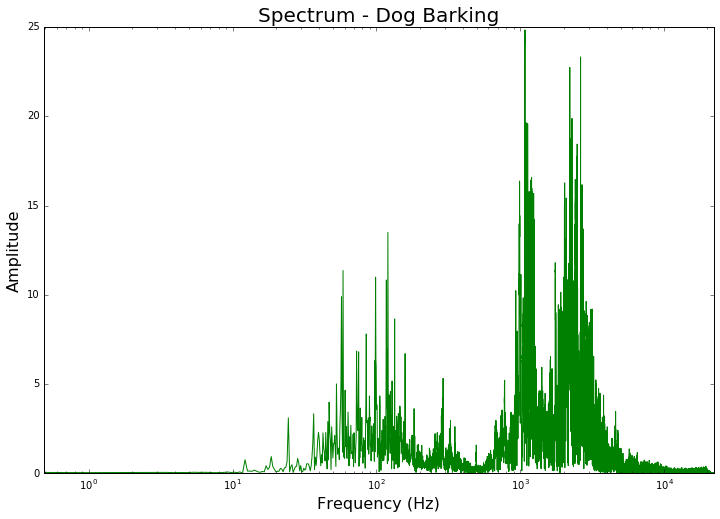

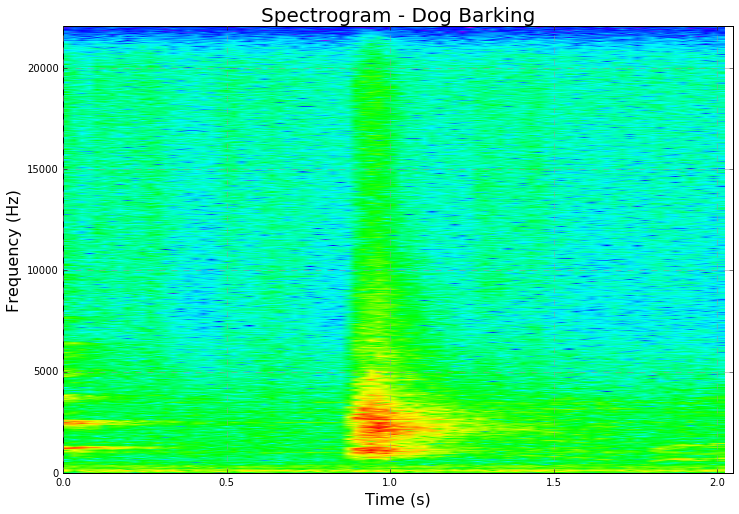

My family go to sleep
Sample rate:  44100 frames per Second
Number of samples:  100800
Duration in seconds:  2.286


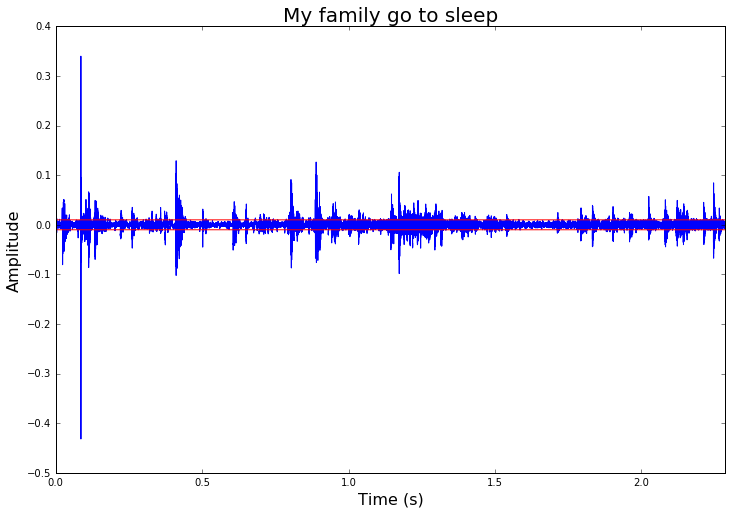

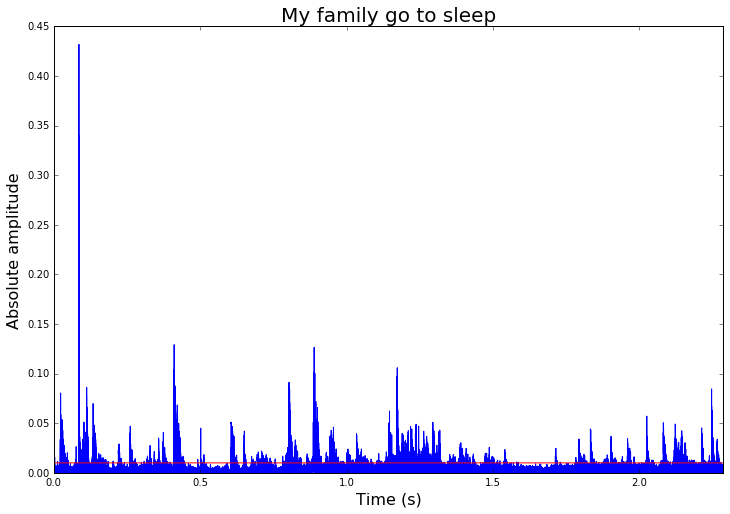

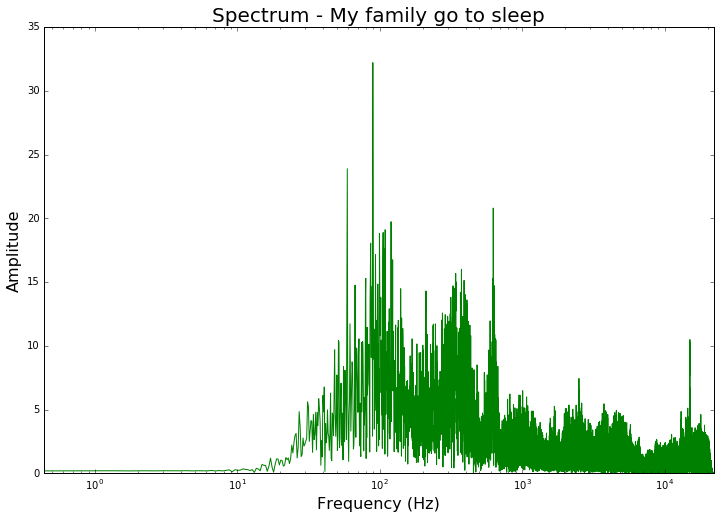

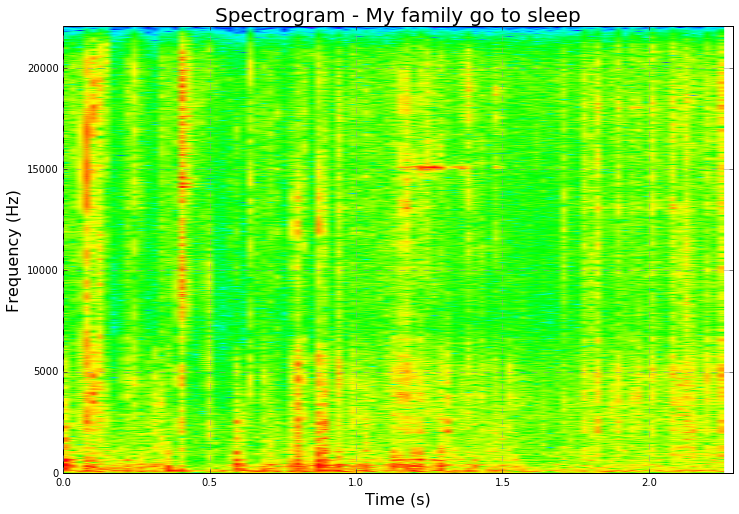

Birds Chirping after Dawn
Sample rate:  44100 frames per Second
Number of samples:  132300
Duration in seconds:  3.000


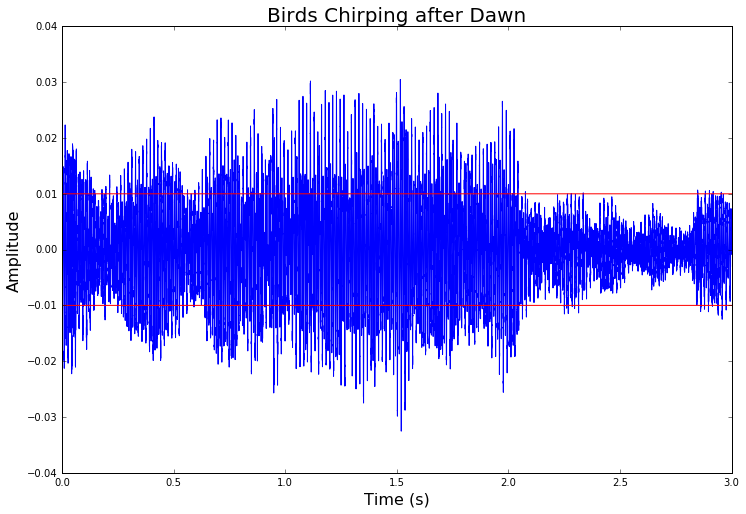

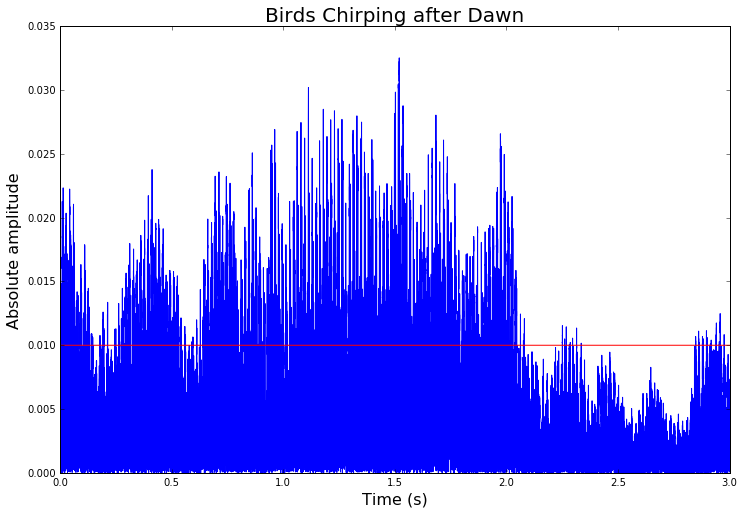

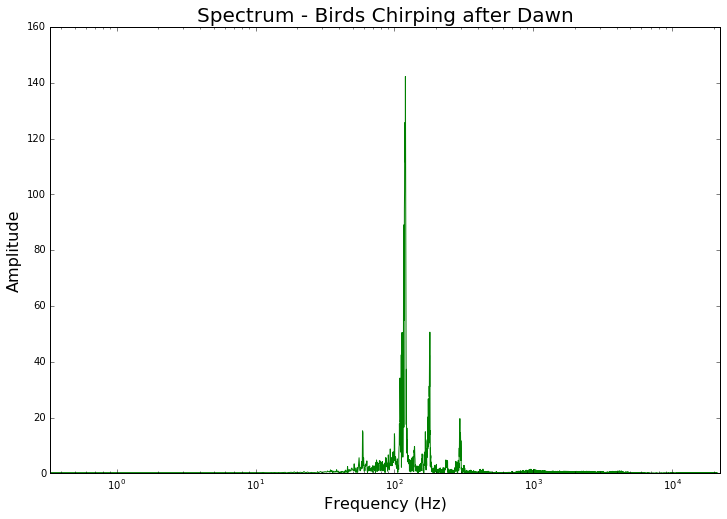

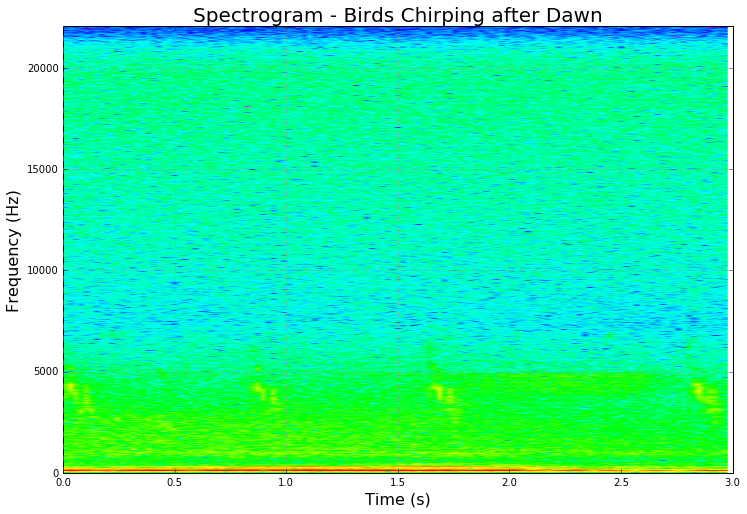

In [3]:
#Doing analysis for every wav file
for k in range(0,n):
    fs, samples = wavfile.read(wavlist[k])
    
    duration = float(len(samples)) / fs
    sample_len = len(samples)
    samples_red = samples / 32768.0

    print desclist[k]
    print 'Sample rate: ', fs, 'frames per Second'
    print 'Number of samples: ', sample_len
    print 'Duration in seconds: ', '%.3f' % duration

    Ymin = [pow(10,-36/20)] * sample_len

    Yminneg = [-pow(10,-36/20)] * sample_len


    # Time domain
    X = np.linspace(0, duration, num=sample_len)
    plt.figure(figsize=(12,8))
    plt.plot(X, samples_red,'-b')
    plt.plot(X,Ymin,'-r',label="RMS thereshold" )
    plt.plot(X,Yminneg,'-r',label="RMS thereshold" )
    plt.xlim([0, np.max(X)])
    plt.title(desclist[k],fontsize=20) #Corresponding Description
    plt.xlabel('Time (s)',fontsize=16)
    plt.ylabel('Amplitude',fontsize=16)
    plt.show();
    
    # Absolute Value
    absolute_samples_red = np.abs(samples_red)

    plt.figure(figsize=(12,8))
    plt.plot(X, absolute_samples_red)
    plt.plot(X,Ymin,'-r',label="RMS thereshold" )
    plt.xlim([0, np.max(X)])
    plt.title(desclist[k],fontsize=20) #Corresponding Description
    plt.xlabel('Time (s)',fontsize=16)
    plt.ylabel('Absolute amplitude',fontsize=16)
    plt.show()
    
    #Fourier Transform
    dft_output = np.fft.rfft(samples)
    #this rfft is for fourier transform 
    magnitude_spectrum = [np.sqrt(i.real**2 + i.imag**2)/len(dft_output) for i in dft_output]
    freqs = np.linspace(0,fs/2, num=len(dft_output))

    plt.figure(figsize=(12,8))
    plt.plot(freqs, magnitude_spectrum, 'g')
    plt.xscale('log')
    plt.xlim([0, max(freqs)])
    plt.title('Spectrum - {0}'.format(desclist[k]),fontsize=20) #Corresponding Description
    plt.xlabel('Frequency (Hz)',fontsize=16)
    plt.ylabel('Amplitude',fontsize=16)
    plt.show()
    
    
    #Spectrogram
    window_size = 2048

    plt.figure(figsize=(12,8))
    plt.specgram(samples, NFFT = window_size, noverlap = window_size/2, Fs = fs, mode = 'magnitude', scale = 'dB');
    plt.ylim([0, 22050])
    plt.xlim([0, np.max(X)])
    plt.set_cmap('gist_rainbow_r')
    plt.title('Spectrogram - {0}'.format(desclist[k]),fontsize=20)
    plt.xlabel('Time (s)',fontsize=16)
    plt.ylabel('Frequency (Hz)',fontsize=16)
    plt.grid(b=True, which='both', color='0.6',linestyle='--')
    plt.show()

The File before Dusk is a simple sound, the second file obtained from all of the recording. It has almost a few over thereshold values, so there is no major peak, but still sound.

The second file is a dog barking, the first block is when it tried to bark, and the second one is it barking. It is a very small dog, so its bark has high frequencies.

The third file is when my family and I went to sleep, finishing all the day we went to sleep, and moved something to get ready for the night time recording hours, there was a chance of very early in the morning so I decided to move bellow some roof. The first peak corresponds to the moving of the chair where the computer was on.

The last one is some birds chirping a few hours after dawn, so its frequency denotes their chirping.